# Extracción de datos para fuentes no estructuradas

# Caso 1

Extracción de noticias/artículos

In [0]:
# Vamos a instalar una de las librerías que nos permiten obtener el contenido 
# de las noticias de una página web
!pip install goose3

In [0]:
# Importamos la librería
from goose3 import Goose

In [0]:
# Definamos la url a partir de la cual deseamos extraer la noticia
url_noticia = 'https://cnnespanol.cnn.com/2020/02/14/un-asteroide-masivo-pasara-por-la-tierra-despues-del-dia-de-san-valentin/'

In [0]:
# Inicializamos la librería, especificando el lenguaje en la que se encuentra el
# contenido del artículo
g = Goose({'target_language':'es'})
# Extraemos el contenido de la url y almacenamos el contenido en la variable article
article = g.extract(url=url_noticia)

In [0]:
# Veamos el título de la noticia
print ("******* Título de la noticia: ******* \n")
article.title

******* Título de la noticia: ******* 



'Un asteroide masivo pasará por la Tierra después del Día de San Valentín'

In [0]:
# Veamos el contenido de la noticia extraída
# Ya que la noticia puede ser muy larga, vamos a limitar el número de caracteres a desplegar
max_chars_to_show = 300 

print ("******* Contenido de la noticia: ******* \n")
print(article.cleaned_text[:max_chars_to_show])

******* Contenido de la noticia: ******* 

(CNN) — No mucho después de que termine el Día de San Valentín, un asteroide masivo de un estimado entre 439 a 989 metros de largo pasará por la Tierra alrededor de las 6:05 a.m. ET el sábado. Según el rango de tamaño, podría ser entre el tamaño de un puente colgante y más alto que un rascacielos.




In [0]:
from wordcloud import WordCloud
# from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

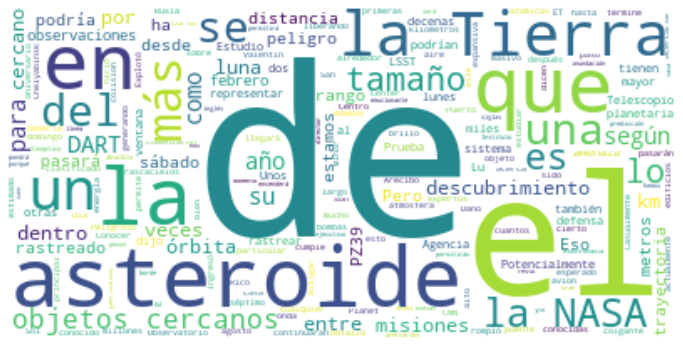

In [0]:
# Creamos el primer wordcloud a partir del texto que hemos obtenido
wordcloud = WordCloud(max_words=200, background_color="white").generate(article.cleaned_text)
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
# En el worcloud previo generado, vemos que existen palabras "conectoras" que 
# se repiten con más frecuencia que el resto.
# Es necesario aplicar un procedimiento para remover los "stopwords"
# https://countwordsfree.com/stopwords/spanish

In [0]:
# Importamos las librerías y utilitarios necesarios para procesar el texto del artículo
import nltk
nltk.download("popular")
from nltk.corpus import stopwords

In [0]:
# Vamos a generar el listado de Stopwords de la librería que debemos usar para 
stopwords_esp = stopwords.words('spanish')

In [0]:
# Veamos las contenido inicial de los stopwords
stopwords_esp[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [0]:
# Puedes adicionar a la lista las palabras propias del contexto de la noticia.. no relevantes que 
# no deberían mostrarse en el wordcloud
stopwords_propias = ['CNN', 'Español']
stopwords_esp.extend(stopwords_propias)

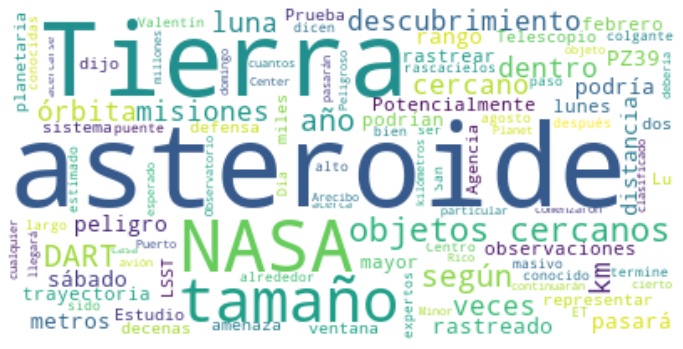

In [0]:
# Volvamos a crear el wordcloud, pero esta vez, vamos a remover las stopwords
wordcloud = WordCloud(max_words=100, background_color="white", stopwords=stopwords_esp).generate(article.cleaned_text)
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Caso 2

In [0]:
# Crea un archivo que contengo el texto (plano) que deseas analizar
# Tomar en cuenta el coding del origen de texto
archivo_nombre = 'libro.txt'
# Vamos a leer el contenido del archivo y almacenaremos el texto del archivo en la 
# variable mi_texto
f = open(archivo_nombre, "r")
mi_texto = f.read()

In [0]:
# Imprimimos el contenido de la variable "mi_texto"
mi_texto[:100]

' \n\nChapter 1  An Introduction to Data Mining\n\n1.1\tIntroduction\nLa minería de datos es el estudio de '

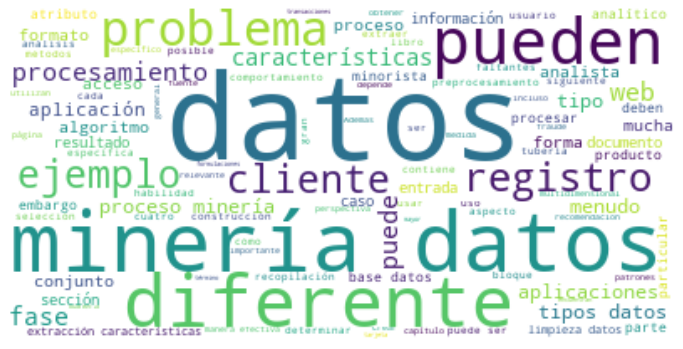

In [0]:
# Volvamos a crear el wordcloud a partir del texto introducido.
wordcloud = WordCloud(max_words=100, background_color="white", stopwords=stopwords_esp).generate(mi_texto)
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Caso 3

In [0]:
!pip install feedparser

     |████████████████████████████████| 194kB 5.0MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=736d1a33b3c8064aa08b5221137cf5ddda6ac32bd97329b4664f8a08e84301fe
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser


In [0]:
import feedparser

In [0]:
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)



In [0]:
# https://www.paginasiete.bo/rss/

FEED_URL='https://www.paginasiete.bo/rss/feed.html?r=155'

In [0]:

fp = feedparser.parse(FEED_URL)
dato=""
for e in fp.entries:
    print("-------------------------")
    print(remove_tags(e.title))
    # print(e.links[0].href)
    print(remove_tags(e.content[0].value))
    dato+=(remove_tags(e.content[0].value))

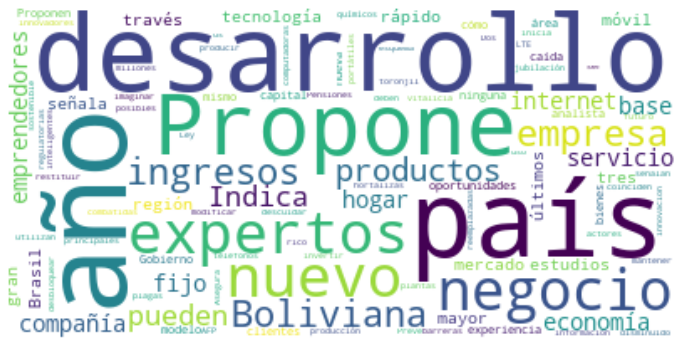

In [0]:
wordcloud = WordCloud(max_words=100, background_color="white", stopwords=stopwords_esp).generate(dato)
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()